In [1]:
import json;
import urllib2
import os.path
import re;
from pymongo import MongoClient;
from riotwatcher import RiotWatcher
from collections import defaultdict
from itertools import chain
import pandas as pd
import cPickle as pickle
import numpy as np

def getUserInput():
    FileExists=os.path.isfile('RitoMongo.conf') ;
    res=[];
    if (FileExists):
        with open('RitoMongo.conf') as f:
            for line in f:
                res.append(line.rstrip('\n'));
                print line.rstrip('\n');
    elif (not FileExists):
        SummonerName= raw_input('Enter your Summoner name: ');
        Region  = (raw_input('Enter your region: ')).upper();
        Key = raw_input('Enter your API Key which you retrieved from Riot website: ');
        f = open('RitoMongo.conf','w');
        f.write(SummonerName+'\n'+Region+'\n'+Key);
        f.close();
    return res;

#================================= Main =====================================================
_InputFields= getUserInput();
SummonerName=_InputFields[0];
Region=_InputFields[1];
Key=_InputFields[2];

BearsAreScary
NA
d8eb3b3a-6401-42af-bb07-a021fd8d9545


In [2]:
w = RiotWatcher(key=Key)
tags = w.static_get_champion_list(champ_data='tags')
tag_dict = defaultdict(list)
champ_dict = defaultdict(list
                        )
for key, value in tags['data'].iteritems():
    tag_dict[value['id']].append(value['name'])
    champ_dict[value['id']].append(value['name'])
    tag_dict[value['id']].append(value['tags'])
    
tag_dict

defaultdict(list,
            {1: [u'Annie', [u'Mage']],
             2: [u'Olaf', [u'Fighter', u'Tank']],
             3: [u'Galio', [u'Tank', u'Mage']],
             4: [u'Twisted Fate', [u'Mage']],
             5: [u'Xin Zhao', [u'Fighter', u'Assassin']],
             6: [u'Urgot', [u'Marksman', u'Fighter']],
             7: [u'LeBlanc', [u'Assassin', u'Mage']],
             8: [u'Vladimir', [u'Mage', u'Tank']],
             9: [u'Fiddlesticks', [u'Mage', u'Support']],
             10: [u'Kayle', [u'Fighter', u'Support']],
             11: [u'Master Yi', [u'Assassin', u'Fighter']],
             12: [u'Alistar', [u'Tank', u'Support']],
             13: [u'Ryze', [u'Mage', u'Fighter']],
             14: [u'Sion', [u'Tank', u'Fighter']],
             15: [u'Sivir', [u'Marksman']],
             16: [u'Soraka', [u'Support', u'Mage']],
             17: [u'Teemo', [u'Marksman', u'Assassin']],
             18: [u'Tristana', [u'Marksman', u'Assassin']],
             19: [u'Warwick', [u'Fight

In [7]:
for k,v in tag_dict.iteritems():
    if 'Assassin' in v[1]:
        print(k,'yes')

(5, 'yes')
(7, 'yes')
(11, 'yes')
(17, 'yes')
(18, 'yes')
(23, 'yes')
(24, 'yes')
(28, 'yes')
(29, 'yes')
(35, 'yes')
(38, 'yes')
(39, 'yes')
(55, 'yes')
(56, 'yes')
(64, 'yes')
(67, 'yes')
(76, 'yes')
(80, 'yes')
(84, 'yes')
(90, 'yes')
(91, 'yes')
(92, 'yes')
(101, 'yes')
(103, 'yes')
(105, 'yes')
(107, 'yes')
(114, 'yes')
(121, 'yes')
(157, 'yes')
(202, 'yes')
(238, 'yes')
(245, 'yes')
(254, 'yes')


In [6]:
champ_df = pd.DataFrame.from_dict(champ_dict,orient='index')
champ_df.columns = ['Name']
champ_df['Assassin'] = 0
champ_df['Mage'] = 0
champ_df['Fighter'] = 0
champ_df['Tank'] = 0
champ_df['Support'] = 0
champ_df['Marksman'] = 0
for k,v in tag_dict.iteritems():
    if 'Assassin' in v[1]:
        champ_df['Assassin'][k] = 1
    else:
        champ_df['Assassin'][k] = 0
    if 'Mage' in v[1]:
        champ_df['Mage'][k] = 1
    else:
        champ_df['Mage'][k] = 0
    if 'Fighter' in v[1]:
        champ_df['Fighter'][k] = 1
    else:
        champ_df['Fighter'][k] = 0
    if 'Tank' in v[1]:
        champ_df['Tank'][k] = 1
    else:
        champ_df['Tank'][k] = 0
    if 'Support' in v[1]:
        champ_df['Support'][k] = 1
    else:
        champ_df['Support'][k] = 0
    if 'Marksman' in v[1]:
        champ_df['Marksman'][k] = 1
    else:
        champ_df['Marksman'][k] = 0
            
champ_df

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

,Name,Assassin,Mage,Fighter,Tank,Support,Marksman
1,Annie,0,1,0,0,0,0
2,Olaf,0,0,1,1,0,0
3,Galio,0,1,0,1,0,0
4,Twisted Fate,0,1,0,0,0,0
5,Xin Zhao,1,0,1,0,0,0
6,Urgot,0,0,1,0,0,1
7,LeBlanc,1,1,0,0,0,0
8,Vladimir,0,1,0,1,0,0
9,Fiddlesticks,0,1,0,0,1,0
10,Kayle,0,0,1,0,1,0


In [20]:
file_one = open('app/user_df.pkl','rb')
user_df = pickle.load(file_one)
file_one.close()
user_df.head(5)
user_df.fillna(0,inplace=True)
x = user_df.to_dict()

,45200856,20627791,27891382,50638239,22300913,49226500,53804651,49631245,30014262,59932448,...,48579166,46173566,20600777,29230651,23552046,32865228,19910079,34961236,390513,46329353
1,5.0,NaN,NaN,3.0,6.0,15.0,NaN,7.0,1.0,NaN,...,NaN,NaN,NaN,3.0,11.0,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,1.0,2.0,2.0,NaN,2.0,8.0,4.0,NaN,...,NaN,1.0,NaN,2.0,1.0,NaN,2.0,NaN,1.0,NaN
3,11.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,366.0,NaN,NaN,NaN,49.0,NaN,NaN,1.0,2.0,16.0,...,3.0,4.0,1.0,NaN,NaN,1.0,1.0,11.0,NaN,NaN
5,NaN,NaN,NaN,6.0,2.0,NaN,NaN,11.0,5.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [48]:
R = user_df.values.T.tolist()



In [52]:
# parameters : U, V and features: D 
# this will establish matrix factorization using Gradient Descent
# given matrix is minimized

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):

    Q = Q.T
    
    error =[]
    for step in xrange(steps):
        print 'Step number %d' % step
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                
                # if rated:
                if R[i][j] > 0:
                    
                    # calc. error 
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                        
                    # hence our gradient is d/dpik(eij^2) = -2(rij-Rhat)(qkj) =-2eij(qkj)
                    
                    # Here alpha is a constant whose value determines the rate of the approaching min.. 
                    
                    # our parameter B is used to control the magnitudes of the user-feature and item-features vectors.
                    # such that P and Q would give a good approximation of R
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])

                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = np.dot(P,Q)

        e = 0

        for i in xrange(len(R)):

            for j in xrange(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    
                    
                    for k in xrange(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
                        
        error.append(e)              
        if e < 0.001:

            break

    return P, Q.T,error

In [8]:
R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4]]

In [ ]:
R=np.array(R)

N= len(R)
M=len(R[0])

# We can assign 
K=6

# find p,q:   init U and M with randomized value between 0.0 and 1.0 with standard Gaussian distribution
P=np.random.rand(N,K)
Q=np.random.rand(M,K)
            
nP,nQ,error= matrix_factorization(R,P,Q,K)
nR=np.dot(nP,nQ.T)

Step number 0
Step number 1
Step number 2
Step number 3
Step number 4
Step number 5
Step number 6
Step number 7
Step number 8
Step number 9
Step number 10
Step number 11
Step number 12
Step number 13
Step number 14
Step number 15
Step number 16
Step number 17


In [50]:
print "P Matrix"
print nP
print nP.shape
print '\n'

print "Q Matrix"
print nQ
print nQ.shape

print '\n'
print "R_hat Matrix"
print nR
nR.shape

P Matrix
[[-0.1738426   1.24935193 -0.24380161  1.34155669  0.36468533  1.37989597]
 [ 0.3038443   1.08465464 -0.49438111  1.15197602  0.76570748  0.60716079]
 [ 0.95096506  0.49020422  1.6833117   0.55566203  0.41710785  0.45416724]
 [ 1.23077689  0.07557466  0.85552036  0.79499774  1.04812407 -0.01302502]
 [ 1.1677811   0.08307443  0.96554959  0.69955248  0.49311266  1.14122784]]
(5, 6)


Q Matrix
[[-0.14812127  1.22463535 -0.50803447  1.04574591  0.67289931  1.1963743 ]
 [-0.20132457  0.99876137 -0.03096585  0.6249347   0.34994217  0.52343163]
 [ 1.13101098  0.39182476  0.73832478  1.14677454  0.89789059  1.46198417]
 [ 1.04106385  0.42971499  1.86236016  0.30104454  0.80319018  0.29282277]]
(4, 6)


R_hat Matrix
[[ 4.97880596  2.97863807  3.99620101  1.00268256]
 [ 3.98077306  2.34311906  3.29986972  1.00129333]
 [ 1.0093898   0.97696084  4.18617839  4.97088255]
 [ 0.99667814  0.65799029  3.88702761  3.9844386 ]
 [ 1.86693518  1.02505974  4.97966027  3.99047132]]


(5, 4)

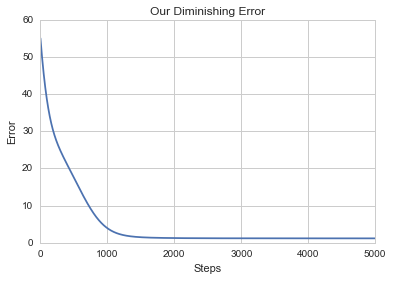

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

plt.plot(error)
plt.title ("Our Diminishing Error")

plt.ylabel('Error')
plt.xlabel('Steps')